# Model-agnostic methods
## Model-agnostic: Partial Dependency Plot (PDP)
### One dimensional Partial Dependance Plot
The partial dependence plot shows the marginal effect of a feature on the predicted outcome of a previously fit model.

Loading libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('day.csv')
df.head(n=2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


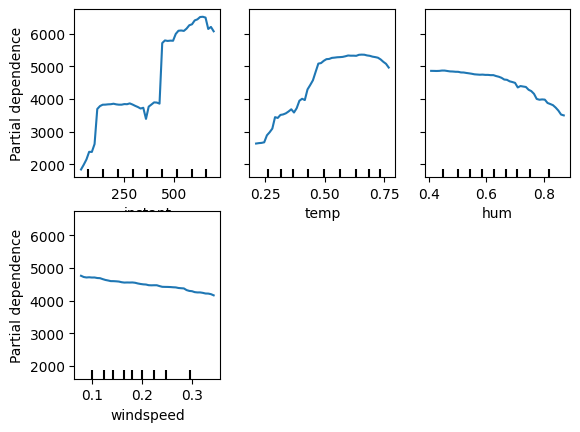

In [10]:
features = ['instant', 'temp', 'hum', 'windspeed']
target = 'cnt'

X = df[features]
y = df[target]

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=['instant', 'temp', 'hum', 'windspeed'],
    kind='average',
    grid_resolution=50
)
plt.show()


The influence of days since 2011, temperature, humidity and wind speed on the predicted bike counts.

days_since_2011 (instant)
The PDP show a steady upwards trend over time. This reflects a bike uasage increased over the years. As time progresses, bike rentals increase.

temperature
The plot shows a rise in bike counts as tempreature increases up to a point (e.g. around 25-30 C) then slightly declines at high temeratures. People tend to bike more when it's warm but not too hot.

humidity
PDP shows decline in rentals as humidity increases. High humidity likely discourages outdoor activity. Negative influence - higher humidity reduces bike rentals.

windspeed
As wind speed increases, predicted bike counts decline. Wind create resistence and discomfort for cyclists.


## Bidimensional Partial Dependency Plot
Generating a 2D Partial Dependency Plot with humidity and temperature to predict the number of bikes rented depending on those parameters.

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
import seaborn as sns
import matplotlib.pyplot as plt

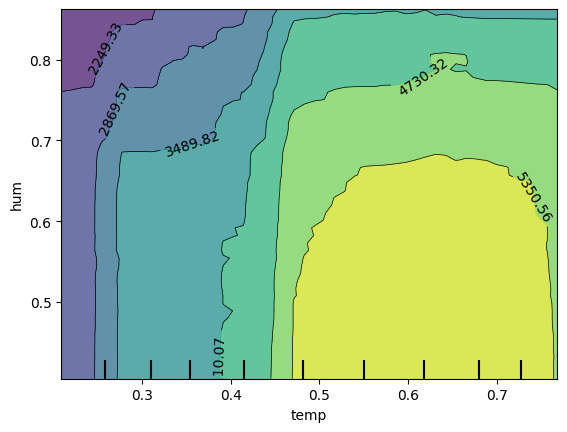

In [12]:
df_sample = df.sample(n=500, random_state=42)

features = ['temp', 'hum', 'windspeed', 'instant']
target = 'cnt'

X = df_sample[features]
y = df_sample[target]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Generate 2D partial dependence
from sklearn.inspection import PartialDependenceDisplay

disp = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=[('temp', 'hum')],
    kind='average',
    grid_resolution=50
)

plt.show()

Interpretation:
- Higher temperature (up to a point) tend to increase bike rentals, especially when humidity is low to moderate.
- At very high humidity levels, even warm temperatures reduce bike usage - indicating discomfort.

## PDP to explain the price of a house

In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("kc_house_data.csv")
df.head(n=2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


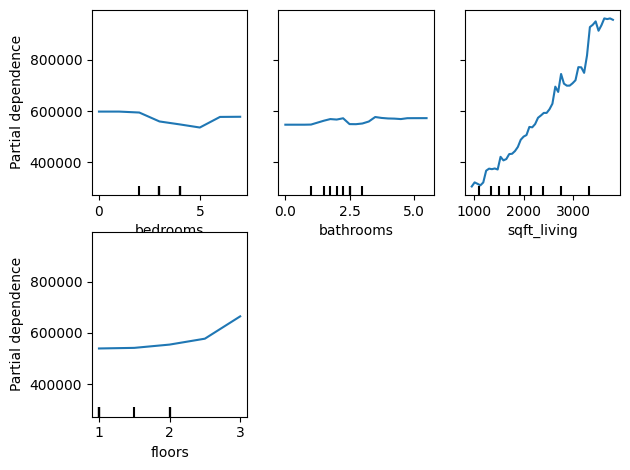

In [19]:
# Sample to reduce size
df_sample = df.sample(n=1000, random_state=42)

# Select features and target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']
target = 'price'

X = df_sample[features]
y = df_sample[target]

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Generate PDP plots for selected features
display = PartialDependenceDisplay.from_estimator(
    model,
    X,
    features=['bedrooms', 'bathrooms', 'sqft_living', 'floors'],
    kind='average',
    grid_resolution=50
)

plt.tight_layout()
plt.show()


The influence of variables on Price

bedrooms
More bedrooms don't always mean higher prices - reflects diminishing returns or older/larger homes with lower price/sqft.

bathrooms
No influence

sqft_living
Strong upward trend - price rises sharply with increased living area. One of the strongest predictors. Larger homes are consistently more expensive.

floors
Prices slightly increases with the number of floors.